In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1 = np.loadtxt("1950-1975-01new.out")
data2 = np.loadtxt("1975-2000-01new.out")
data3 = np.loadtxt("2000-2050-01new.out")
data4 = np.loadtxt("2025-2050-01new.out")

In [3]:
data1

array([-1.29572691e-03, -1.72413863e-03, -5.94976957e-04, -3.01524267e-05,
       -4.92215138e-05, -2.10760619e-03, -2.36226041e-03, -7.96300009e-04,
       -1.23090120e-04, -1.75152813e-03, -3.97452024e-04, -7.39725718e-04,
       -1.01439702e-03, -8.89481605e-04, -1.50674993e-03, -2.13577085e-04,
       -2.44882302e-03, -2.16695686e-03, -8.62215622e-04, -2.28001601e-03,
       -2.96184151e-03, -1.23128148e-03, -1.77264368e-03, -2.08175688e-03,
       -1.14018805e-03, -1.06163981e-03,  2.99879258e-04, -2.41278264e-03,
       -1.02069821e-03, -8.28358586e-04, -6.01425548e-04, -1.40757495e-03,
       -1.15025024e-03, -2.27800226e-03, -1.48980159e-03, -1.54010416e-03,
       -1.00888431e-03, -1.67002973e-03, -5.82487399e-04, -3.82996224e-05,
        5.78835191e-05, -6.96725184e-04, -1.11672732e-03, -1.28977850e-03,
       -5.46802018e-04, -5.60089586e-05, -1.59709521e-03, -1.07024282e-03,
       -1.21973125e-03, -3.82529293e-04, -5.83173645e-04, -1.07316167e-03,
       -1.36711409e-03, -

In [3]:
result = np.zeros(1200)
result[0:300] =data1
result[300:600] =data2
result[600:900] =data3[0:300]
result[900:1200] =data4

In [4]:
ww2 = np.convolve(result, np.ones((60,))/60, mode='valid')

In [5]:
ww2.shape

(1141,)

In [6]:
mean = np.nanmean(ww2[:1140])
fin = ww2 -mean

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


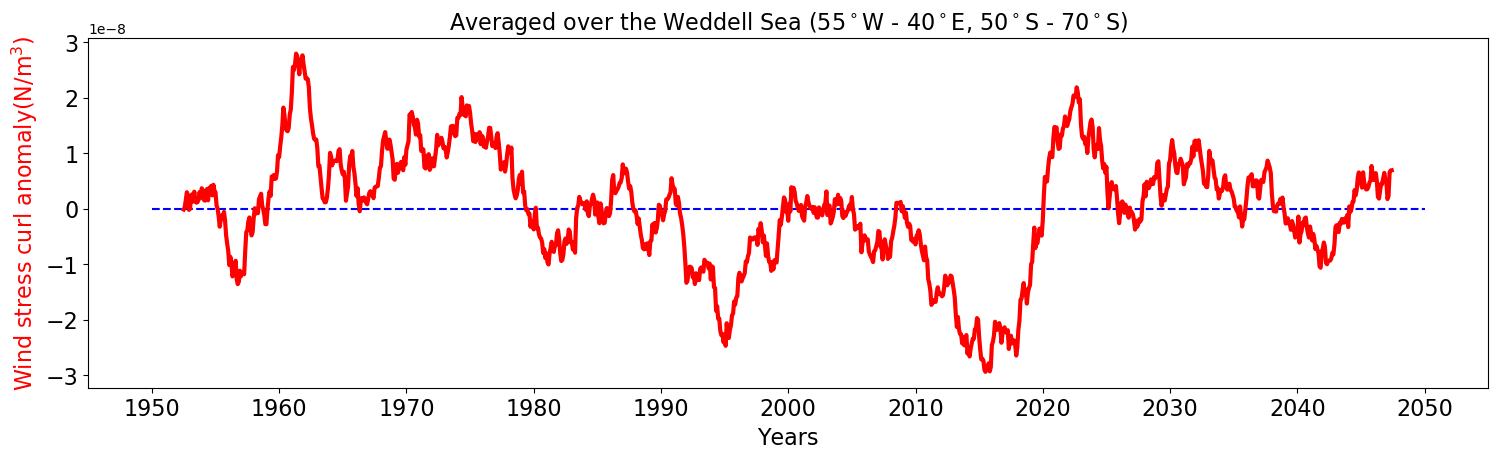

In [7]:
t=np.arange(30,1170,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(t,0.0001*fin[:1140],'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
#########################################
plt.xticks(range(0,1201,120), ['1950', '1960', '1970', '1980','1990','2000','2010','2020','2030','2040','2050'],**my_font)
plt.hlines(0, 0, 1200, colors = "blue",linestyles = "dashed")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'red',**my_font)
plt.axis("tight")
ax0.set_title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)


plt.savefig("w2.png",bbox_inches='tight',dpi=fig.dpi)

In [8]:
weddle = np.loadtxt("weddle.out")


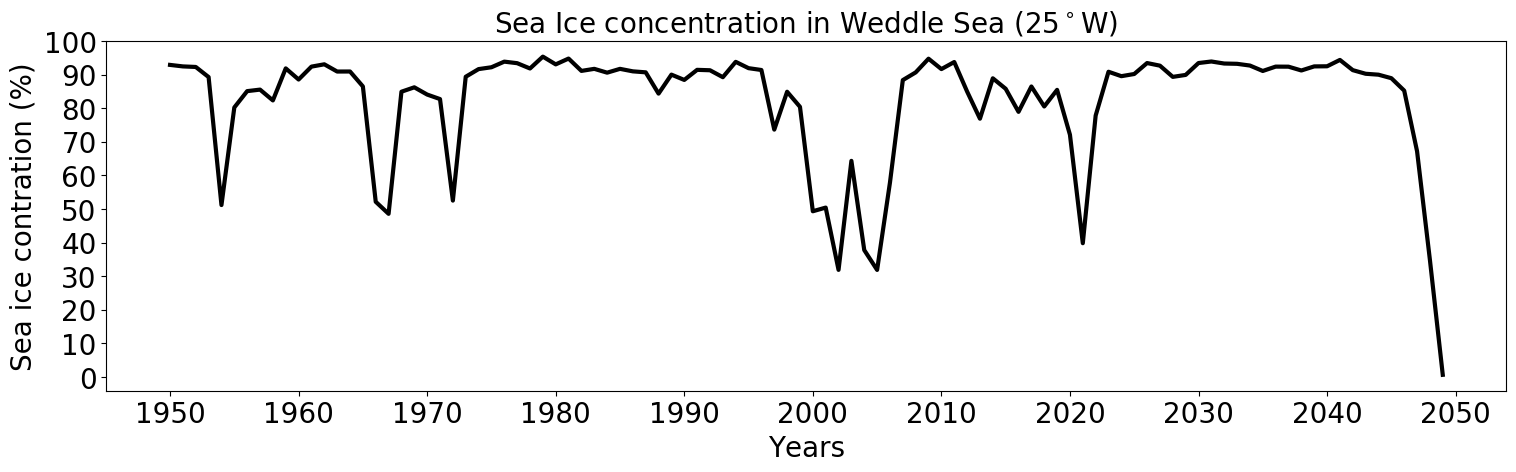

In [11]:
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
my_font = {'fontname':'Cambria', 'size':'20'}
 
ax0.plot(weddle,'k',linewidth=3)
#im = ax0.plot(weddle,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,101,10), ['1950', '1960', '1970', '1980','1990','2000','2010','2020','2030','2040','2050'],**my_font)

plt.yticks(range(0,101,10), ['0', '10','20','30', '40', '50','60','70', '80','90','100'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Sea ice contration (%)',**my_font)
ax0.set_title('Sea Ice concentration in Weddle Sea (25$^\circ$W)',**my_font)
plt.savefig("weddle.png",bbox_inches='tight',dpi=fig.dpi)